<a href="https://colab.research.google.com/github/samuel-zahner/Intro-to-AI/blob/main/logistic_regression(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import math
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


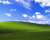

In [55]:
image1 = Image.open('/content/gdrive/My Drive/Colab Notebooks/to RGB/bliss.png')
image1 = image1.convert('RGB')
image1.thumbnail((50,50))
image1

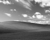

In [38]:
image2 = ImageOps.grayscale(image1)
image2

In [10]:
def sigmoid(w, x):
  z = np.dot(w,x)
  h = 1/(1+math.exp(1)**(-z))
  return h

In [39]:
def model(w, x):
  red = sigmoid(w[0],x)
  green = sigmoid(w[1],x)
  blue = sigmoid(w[2],x)

  red = 255 * red.mean()
  green = 255 * green.mean()
  blue = 255 * blue.mean()

  #print(x)
  #print(red)
  return [red, green, blue]

In [12]:
def loss(w, x, y):
  loss_red = y[0] * math.log(model(w,x)[0]) + (1-y[0])*math.log(1-model(w, x)[0])
  loss_green = y[1] * math.log(model(w,x)[1]) + (1-y[1])*math.log(1-model(w, x)[1])
  loss_blue = y[2] * math.log(model(w,x)[2]) + (1-y[2])*math.log(1-model(w, x)[2])
  
  return [loss_red, loss_green, loss_blue]

In [25]:
def L(w, x, y):
  gradient_red = np.dot((model(w,x)[0] - y[0]),x)
  gradient_green =  np.dot((model(w,x)[1] - y[1]),x)
  gradient_blue = np.dot((model(w,x)[2] - y[2]),x)

  gradient_red = gradient_red.mean()
  gradient_green = gradient_green.mean()
  gradient_blue = gradient_blue.mean()

  return [gradient_red, gradient_green, gradient_blue]

In [43]:
w = [0,0,0]

alpha = .00001

num_epochs = 100

for epoch in range(num_epochs):
  for i in range(0, 48):
    for j in range(0, 38):
      x = [1, image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i+2,j)), image2.getpixel((i, j+1)), 
           image2.getpixel((i+1, j+1)), image2.getpixel((i+2, j+1)), image2.getpixel((i, j+2)), image2.getpixel((i+1, j+2)), image2.getpixel((i+2, j+2))]
      y = image1.getpixel((i+1, j+1))

      gradient_red, gradient_green, gradient_blue = L(w, x, y)

      w[0] = w[0] - alpha * gradient_red
      w[1] = w[1] - alpha * gradient_green
      w[2] = w[2] - alpha * gradient_blue
  if epoch %10 == 0:
    print(f'epoch: {epoch}')
    #print(f'loss: {loss(w,x,y)}')



epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90


[-0.029702517008942077, -0.0203331260423214, -0.062052646939449306]


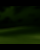

In [49]:
data = np.zeros((50,40, 3), dtype=np.uint8)
print(w)
for i in range(0, 48):
    for j in range(0, 38):
        x = [image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i+2,j)), image2.getpixel((i, j+1)), 
           image2.getpixel((i+1, j+1)), image2.getpixel((i+2, j+1)), image2.getpixel((i, j+2)), image2.getpixel((i+1, j+2)), image2.getpixel((i+2, j+2))]
        r,g,b = model(w,x)
        #print(r,g,b)
        data[i+1][j+1] = [r,g,b]
image3 = Image.fromarray(data, 'RGB')
image3 = image3.rotate(-90)
image3